Observations:
1. The data shows temperatures are hotter nearer the equator. As the latitude increases above 0 the temperatures will start to decrease and as the latitude decreases below 0 the temperatures will also drop. There is moderate to strong correlation of this.

2. There was no correlation between cloud cover and latitude. There was a wide variance of cloud cover spread over the different latitudes and the correlation value was low.

3. There was no correlation between latitude and wind speed. There was a wide variance of wind speed spread over the different latitudes and the correlation value was low.

In [27]:
# Import dependancies
import json
import random
from citipy import citipy
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.stats as st

# Import API key
from config import weather_api_key

In [2]:
# generate random lat and long
city_df = pd.DataFrame({"Lat":np.random.uniform(-90,90,1400),"Lng":np.random.uniform(-180,180,1400)})
city_df.head()


,Lat,Lng
0,51.917854,-89.269802
1,-28.899229,30.521664
2,37.873070,96.718583
3,-27.850741,52.889446
4,-82.124047,-133.862385


In [3]:
#  Generate Cities List
cities_name = []
countrycode = []
for x in range(0,len(city_df["Lat"])):
    lat = city_df.iloc[x]["Lat"]
    lng = city_df.iloc[x]["Lng"]
    city = citipy.nearest_city(lat,lng)
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)

city_df["City"] = cities_name
city_df["Country"] = countrycode
city_df.head()

,Lat,Lng,City,Country
0,51.917854,-89.269802,geraldton,ca
1,-28.899229,30.521664,greytown,za
2,37.873070,96.718583,yumen,cn
3,-27.850741,52.889446,taolanaro,mg
4,-82.124047,-133.862385,rikitea,pf


In [4]:
# remove duplicate cities
no_dup_cities = city_df.drop_duplicates("City", keep="first")
no_dup_cities = no_dup_cities.copy()
no_dup_cities

,Lat,Lng,City,Country
0,51.917854,-89.269802,geraldton,ca
1,-28.899229,30.521664,greytown,za
2,37.873070,96.718583,yumen,cn
3,-27.850741,52.889446,taolanaro,mg
4,-82.124047,-133.862385,rikitea,pf
...,...,...,...,...
1387,52.923287,24.166263,vawkavysk,by
1391,19.312481,89.180373,paradwip,in
1394,18.976839,-128.562314,guerrero negro,mx
1396,3.971433,73.564706,male,mv


In [7]:
# Create new columns for data from API to be inserted
no_dup_cities["Temperature"] = ""
no_dup_cities["Humidity"] = ""
no_dup_cities["Cloud cover"] = ""
no_dup_cities["Wind speed"] = ""
no_dup_cities["Date"] = ""
no_dup_cities.reset_index(drop=True)

,Lat,Lng,City,Country,Temperature,Humidity,Cloud cover,Wind speed,Date
0,51.917854,-89.269802,geraldton,ca,,,,,
1,-28.899229,30.521664,greytown,za,,,,,
2,37.873070,96.718583,yumen,cn,,,,,
3,-27.850741,52.889446,taolanaro,mg,,,,,
4,-82.124047,-133.862385,rikitea,pf,,,,,
...,...,...,...,...,...,...,...,...,...
593,52.923287,24.166263,vawkavysk,by,,,,,
594,19.312481,89.180373,paradwip,in,,,,,
595,18.976839,-128.562314,guerrero negro,mx,,,,,
596,3.971433,73.564706,male,mv,,,,,


In [12]:
params = {
    "appid": weather_api_key,
    "units": "metric"
}
base_url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in no_dup_cities.iterrows():
    city_name = row["City"]

    params["q"] = city_name
    response = requests.get(base_url, params=params).json()
    
    try:
        print(f"Processing Record {index} of set 1 {city_name}")
        no_dup_cities.loc[index, "Temperature"] = response["main"]["temp_max"]
  
        print(f"Processing Record {index} of set 2 {city_name}")
        no_dup_cities.loc[index, "Humidity"] = response["main"]["humidity"]
  
        print(f"Processing Record {index} of set 3 {city_name}")
        no_dup_cities.loc[index, "Cloud cover"] = response["clouds"]["all"]
    
        print(f"Processing Record {index} of set 4 {city_name}")
        no_dup_cities.loc[index, "Wind speed"] = response["wind"]["speed"]
   
        no_dup_cities.loc[index, "Date"] = datetime.utcfromtimestamp(response["dt"]).strftime("%Y-%m-%d %H:%M:%S")
    except(KeyError, IndexError):
        print("Missing data ...... Skipping")

Processing Record 0 of set 1 geraldton
Processing Record 0 of set 2 geraldton
Processing Record 0 of set 3 geraldton
Processing Record 0 of set 4 geraldton
Processing Record 1 of set 1 greytown
Processing Record 1 of set 2 greytown
Processing Record 1 of set 3 greytown
Processing Record 1 of set 4 greytown
Processing Record 2 of set 1 yumen
Processing Record 2 of set 2 yumen
Processing Record 2 of set 3 yumen
Processing Record 2 of set 4 yumen
Processing Record 3 of set 1 taolanaro
Missing data ...... Skipping
Processing Record 4 of set 1 rikitea
Processing Record 4 of set 2 rikitea
Processing Record 4 of set 3 rikitea
Processing Record 4 of set 4 rikitea
Processing Record 5 of set 1 palmer
Processing Record 5 of set 2 palmer
Processing Record 5 of set 3 palmer
Processing Record 5 of set 4 palmer
Processing Record 6 of set 1 bredasdorp
Processing Record 6 of set 2 bredasdorp
Processing Record 6 of set 3 bredasdorp
Processing Record 6 of set 4 bredasdorp
Processing Record 7 of set 1 hob

In [18]:
# clean dataframe and remove NaN
no_dup_cities.replace('', np.nan, inplace=True)
no_dup_cities.dropna(inplace=True)

In [22]:
# Export the city data into a .csv.
no_dup_cities.to_csv("city_weather_test.csv", index=True)
# Display the DataFrame
no_dup_cities.head()

,Lat,Lng,City,Country,Temperature,Humidity,Cloud cover,Wind speed,Date
0,51.917854,-89.269802,geraldton,ca,18.23,77.0,90.0,3.60,2021-07-22 08:52:30
1,-28.899229,30.521664,greytown,za,11.74,39.0,19.0,1.81,2021-07-22 08:53:34
2,37.873070,96.718583,yumen,cn,33.84,24.0,56.0,9.25,2021-07-22 08:53:35
4,-82.124047,-133.862385,rikitea,pf,22.30,71.0,0.0,6.69,2021-07-22 08:53:36
5,56.284596,-146.129518,palmer,us,16.92,91.0,1.0,0.00,2021-07-22 08:53:37


In [19]:
#  Inspect the data and remove the cities where the humidity > 100%.
no_dup_cities.describe()
# Skip this step if there are no cities that have humidity > 100%.

,Lat,Lng,Temperature,Humidity,Cloud cover,Wind speed
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,19.541896,16.509378,21.214362,68.210721,54.214418,3.712699
std,38.384904,92.378820,8.516754,22.026919,39.842494,2.616994
min,-89.772630,-174.690575,-0.140000,8.000000,0.000000,0.000000
25%,-8.663269,-60.052788,14.930000,55.000000,9.000000,1.730000
50%,24.082012,23.711051,22.270000,73.000000,60.000000,3.100000
75%,50.197105,92.442048,26.820000,86.000000,97.000000,5.290000
max,89.216314,177.819273,44.760000,100.000000,100.000000,13.870000


Plotting the data

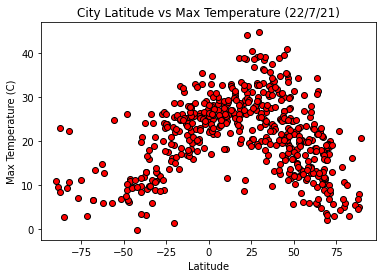

In [43]:
# Latitude vs. Temperature Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Max Temperature (22/7/21)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

plt.savefig("Images/lat_temp.png")

plt.show()

The code plots the latitude of a city and it's maximum temperature. Shows hotter temperatres closer to the equator.

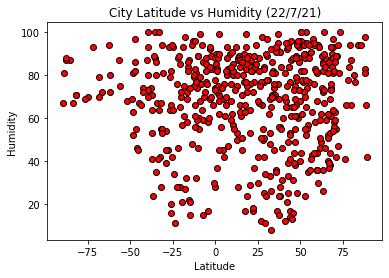

In [44]:
#  Latitude vs. Humidity Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Humidity (22/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("Images/lat_humid.png")

plt.show()

The code plots the latitude of a city and it's humidity level.

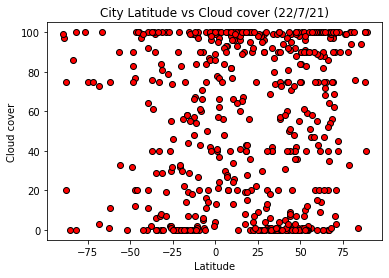

In [45]:
#  Latitude vs. Cloudiness Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Cloud cover (22/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

plt.savefig("Images/lat_cloud.png")

plt.show()

The code plots the latitude of a city and the level of cloud cover.

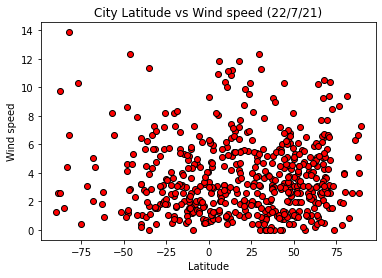

In [46]:
# Latitude vs. Wind Speed Plot
plt.scatter(no_dup_cities["Lat"], no_dup_cities["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("City Latitude vs Wind speed (22/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

plt.savefig("Images/lat_wind.png")

plt.show()

The code plots the latitude of a city and the wind speed.

The r-value is: -0.5880513859961446


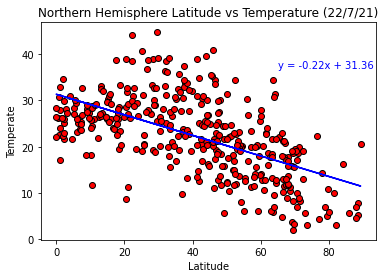

In [47]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Northern = no_dup_cities[no_dup_cities["Lat"]>0]

plt.scatter(Northern["Lat"], Northern["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Temperature (22/7/21)")
plt.ylabel("Temperate")
plt.xlabel("Latitude")
# linear regression
linear = st.linregress(Northern["Lat"], Northern["Temperature"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (65,37), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/N_lat_temp.png")

plt.show()

The r-value is: 0.6499845115817171


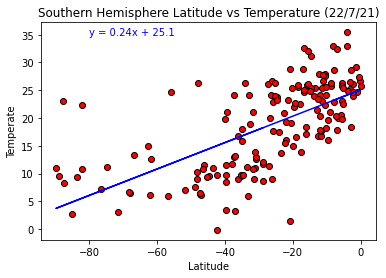

In [57]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Southern = no_dup_cities[no_dup_cities["Lat"]<0]

plt.scatter(Southern["Lat"], Southern["Temperature"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Temperature (22/7/21)")
plt.ylabel("Temperate")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Temperature"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-80,35), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/S_lat_temp.png")

plt.show()

There is a moderate to strong correlation of latitude and max temperatures. As the latitude gets closer to 0, the max temperatures will generally rise.

The r-value is: 0.0036719882533428286


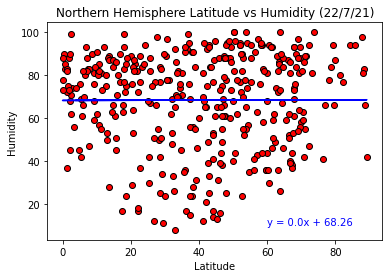

In [56]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Humidity (22/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Humidity"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (60,10), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/N_lat_humid.png")

plt.show()

The r-value is: -0.11439863779041953


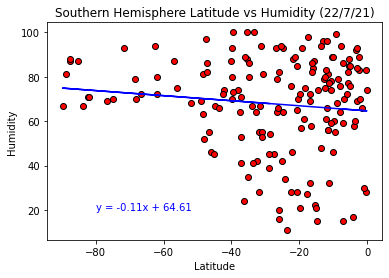

In [55]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Humidity"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Humidity (22/7/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Humidity"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-80,20), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/S_lat_humid.png")

plt.show()

There is no correlation between humidity and latitude. The r-value is very low for both hemispheres.

The r-value is: 0.059645670892117426


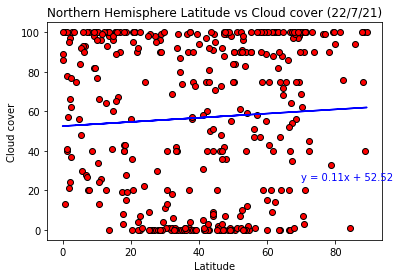

In [58]:
#  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Cloud cover (22/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Cloud cover"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (70,25), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/N_lat_cloud.png")

plt.show()

The r-value is: -0.08991034356649379


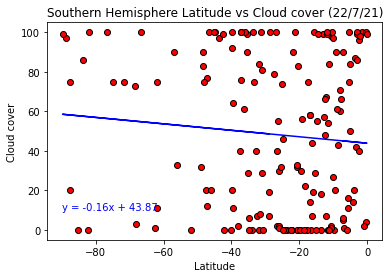

In [52]:
#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Cloud cover"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Cloud cover (22/7/21)")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Cloud cover"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-90,10), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/S_lat_cloud.png")

plt.show()

There is no correlation between latitude and cloud cover.

The r-value is: -0.028272472304381475


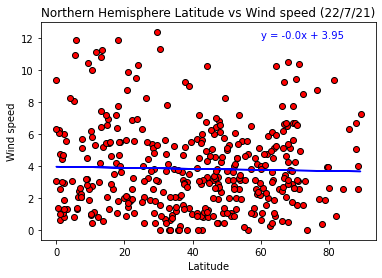

In [53]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(Northern["Lat"], Northern["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("Northern Hemisphere Latitude vs Wind speed (22/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Northern["Lat"], Northern["Wind speed"])
pred_line = Northern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Northern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (60,12), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/N_lat_wind.png")

plt.show()

The r-value is: -0.21636596834886174


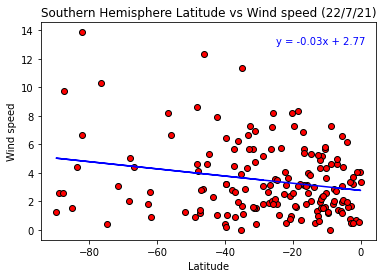

In [54]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(Southern["Lat"], Southern["Wind speed"], color="red", edgecolor="black", marker="o") 

plt.title("Southern Hemisphere Latitude vs Wind speed (22/7/21)")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")

# linear regression
linear = st.linregress(Southern["Lat"], Southern["Wind speed"])
pred_line = Southern["Lat"] * linear[0] + linear[1]
pred_line
plt.plot(Southern["Lat"], pred_line, color="blue")
plt.annotate(f"y = {round(linear[0],2)}x + {round(linear[1],2)}", (-25,13), color="blue")

print(f"The r-value is: {linear[2]}")

plt.savefig("Images/S_lat_wind.png")

plt.show()

There is a weak to no correlation between latitude and wind speed.